# SpaceShipt Titanic Kaggle 
## kaggle link = https://www.kaggle.com/competitions/spaceship-titanic

### The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars. While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension! to help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

## train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data

#### PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
#### HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
#### CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
#### Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
#### Destination - The planet the passenger will be debarking to.
#### Age - The age of the passenger.
#### VIP - Whether the passenger has paid for special VIP service during the voyage.
#### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
#### Name - The first and last names of the passenger.
#### Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


## test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

## sample_submission.csv - A submission file in the correct format.

#### PassengerId - Id for each passenger in the test set.
#### Transported - The target. For each passenger, predict either True or False.




In [1]:
#import data management packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import labelencoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# instantiate labelencoder object
le = LabelEncoder()


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
for i in [train,test]:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Co

In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
len(train)

8693

In [8]:
print(train.shape)
print(test.shape)

(8693, 14)
(4277, 13)


In [9]:
train.groupby(by=["Cabin"]).sum()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Cabin,,,,,,,
A/0/P,52.0,0.0,2344.0,0.0,65.0,6898.0,1
A/0/S,91.0,43.0,4859.0,371.0,10044.0,242.0,0
A/1/S,67.0,279.0,605.0,3374.0,286.0,3.0,3
A/10/P,30.0,0.0,3628.0,289.0,1737.0,4987.0,0
A/10/S,20.0,2.0,4754.0,0.0,246.0,31.0,1
...,...,...,...,...,...,...,...
T/0/P,35.0,415.0,1328.0,0.0,14.0,60.0,0
T/1/P,42.0,0.0,1829.0,2.0,3133.0,2447.0,0
T/2/P,33.0,0.0,28.0,0.0,6841.0,543.0,0


In [10]:
train[['CabinDeck','CabinNum','CabinSide']] = train['Cabin'].str.split('/', expand=True)
test[['CabinDeck','CabinNum','CabinSide']] = test['Cabin'].str.split('/', expand=True)

In [11]:

train.groupby(by=["CabinDeck"])["PassengerId"].count()

CabinDeck
A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
Name: PassengerId, dtype: int64

In [12]:
train.groupby(by=["CabinNum"])["PassengerId"].count()

CabinNum
0       18
1       15
10      12
100     12
1000     6
        ..
995      3
996      1
997      2
998      4
999      6
Name: PassengerId, Length: 1817, dtype: int64

In [13]:
train.groupby(by=["CabinSide"])["PassengerId"].count()

CabinSide
P    4206
S    4288
Name: PassengerId, dtype: int64

In [19]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,"3,576.00",0.00,"6,715.00",49.00,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,"1,283.00",371.00,"3,329.00",193.00,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.00,True,0.00,"6,819.00",0.00,"1,643.00",74.00,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.00,False,0.00,0.00,"1,872.00",1.00,0.00,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.00,False,0.00,"1,049.00",0.00,353.00,"3,235.00",Celeon Hontichre,False,E,608,S


## PassengerId - 
### A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

### Questions
1) Do All 

NameError: name 'raw_data' is not defined

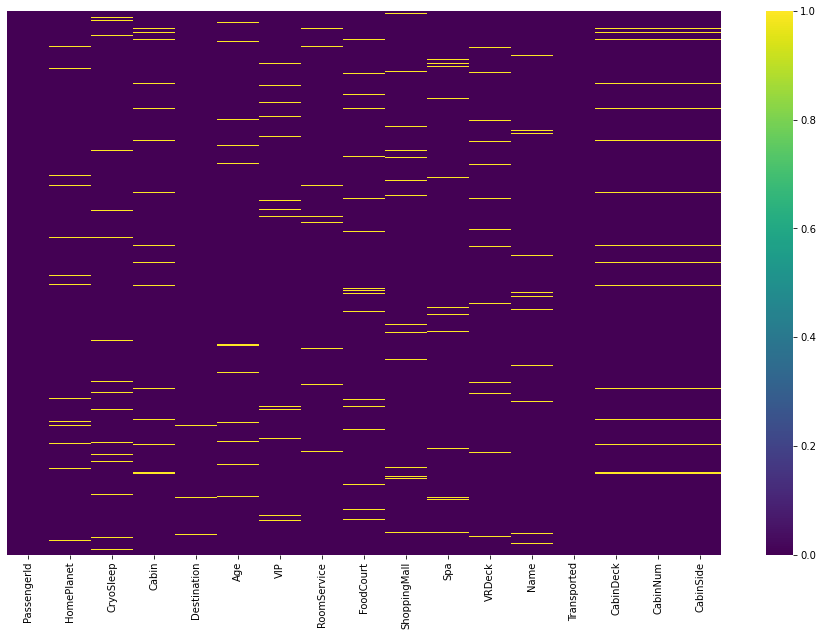

In [17]:

plt.figure(figsize=(16,10))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')
plt.show()

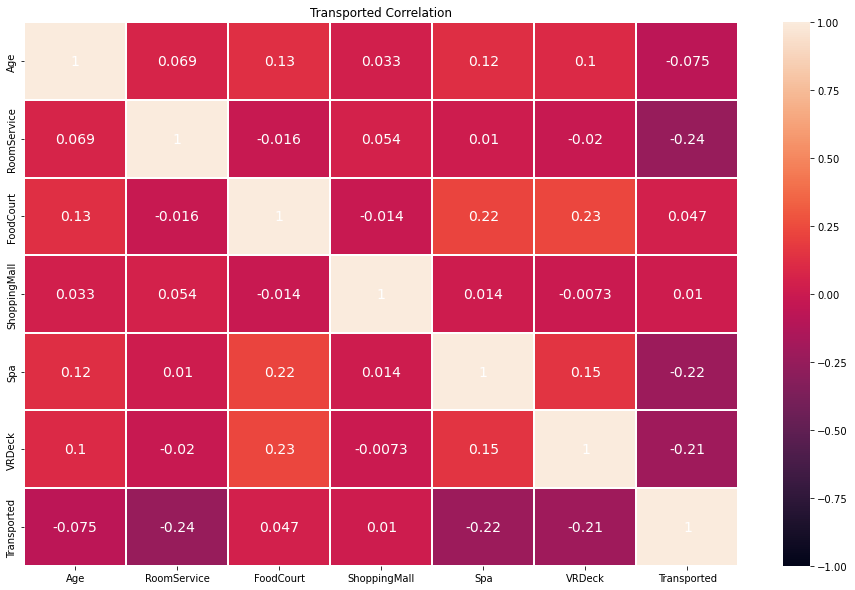

In [18]:
categorical_features = list(train.select_dtypes(include = [object]).columns)
numeric_features = list(train.select_dtypes(include = [np.int64,np.float64]).columns)
boolean_features = list(train.select_dtypes(include = [bool]).columns)

# Heatmap for correlations between numerical variables and the dependent variable
pd.options.display.float_format = "{:,.2f}".format

corr_matrix = train[numeric_features + boolean_features].corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 14, "color": "white"},annot=True)
plt.title("Transported Correlation")
plt.show()

# The numeric variables don't seem to be correlated too much with the dependent variable